# Using KMeans clustering to find Topics in Tweets about the Covid Vaccine

## Import needed libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from ICT_202_preprocessing import *

### Gather the Data

In [2]:
df = pd.read_json('test.json')
def pipe(data):
    a = get_processed_data(data)
    a,_ = tag_culler(a)
    a = make_bigrams([doc.split() for doc in a])
    a = make_bigrams(a)
    a,_ = number_culler([' '.join(doc) for doc in a])
    a,_ = remove_stop(a)
    a,_ = popular_word_culler(a)
    return a


## Preprocess the data

See imported file for specifics

In [4]:
docs = pipe(list(dict.fromkeys(df['content'])))

In [5]:
docs = list(dict.fromkeys(docs))

In [18]:
short_docs = [a for a in docs if len(a.split()) >5 and '_' not in a]

# Create a dtm using TF\*IDF

In [16]:
tfidf = TfidfVectorizer()
tfidf_vecs = tfidf.fit_transform(docs)
feature_names = tfidf.get_feature_names_out()
dense = tfidf_vecs.todense()
lst1 = dense.tolist()
tfidf_df = pd.DataFrame(lst1, columns=feature_names)
terms = tfidf.get_feature_names_out()

# K Means Clusstering of Tweets

## Find the optimal number of topics through Elbow Method

I have gone of the data that I used in the scratchpad - it is likely the results have changed since the processing method has also changed

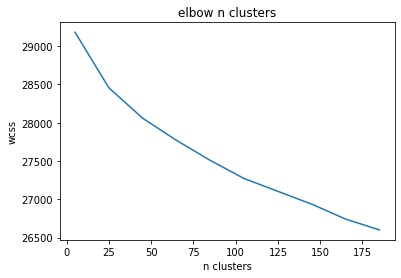

In [17]:
wcss = []
for i in range(5,205,20):
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit_transform(tfidf_vecs)
    wcss.append(kmeans_model.inertia_)
plt.plot(range(5,205,20),wcss)
plt.title('elbow n clusters')
plt.xlabel('n clusters')
plt.ylabel('wcss')
plt.show()

The graph has two noticable bends - The second looks too slight to be significant though

### Elbow Method - 10 to 20 clusters

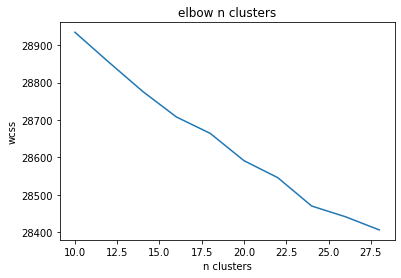

In [18]:
wcss = []
for i in range(10,30,2):
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit_transform(tfidf_vecs)
    wcss.append(kmeans_model.inertia_)
plt.plot(range(10,30,2),wcss)
plt.title('elbow n clusters')
plt.xlabel('n clusters')
plt.ylabel('wcss')
plt.show()

## Display found topics  for 24 clusters

24 looks like the most significant change, but it isnt great

In [26]:
kmeans_model = KMeans(n_clusters=24, random_state=0)
kmeans_out = kmeans_model.fit_transform(tfidf_vecs)
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
pd.DataFrame([[terms[i] for i in order_centroids[j]] for j in range(len(order_centroids))],
                          index=[f'Topic {x}' for x in range(24)]).iloc[:,:9]

,0,1,2,3,4,5,6,7,8
Topic 0,mask,wear,wearing,mandate,work,boosted,go,public,please
Topic 1,ha,caught,country,mark,pfizer,seen,prayed,christian_say,know
Topic 2,booster,2nd,second,two,got,covid,dos,fully,received
Topic 3,flu,wa,cold,every,ive,worse,sick,work,vaccine
Topic 4,biden,trump,president,died,joe,wa,death,took_office,from_coronavirus_60
Topic 5,im,sure,know,ive,boosted,wa,sick,glad,vaxxed
Topic 6,wa,know,first,trump,died,everyone,available,month,pfizer
Topic 7,thread,read,whole,important,sobering,great,interesting,long,please
Topic 8,vaccine,work,wa,died,effective,ha,death,maybe,disease
Topic 9,right,body,choice,know,wa,fine,go,yeah,shouldnt


## Display top 5 tweets for some topics

In [27]:
kmeans_out.shape

(29605, 24)

In [40]:
topic_number = 4
topic = np.argsort(kmeans_out[:,topic_number])
for tweet in list(dict.fromkeys((topic[:35]))):
    print(docs[tweet])

u

f
b
f u
trump biden
wa worse biden biden death trump biden vaccine
people died biden trump biden vaccine
death biden trump vaccine
trump le death biden biden ha vaccine
biden
people died biden trump wa vaccine
covid death biden trump vaccine
people died biden trump despite available biden took_office
people died biden president trump biden trump available took_office epic fail
people died biden trump biden better therapeutic
remember death trump death biden biden supposedly plan biden cure cancer biden lied died
trump whole died biden
happened trump biden
yet died biden trump without vaccine
pelosi suggests death toll worse without biden office hahahaha liar died biden trump biden wa made record trump administration
biden wa trump wa office
biden december_2020 trump wa president
people died biden died trump vaccine
died biden trump without idiot
died biden died trump without vaccine
biden ha death term trump biden help cause work effective
people died biden trump biden developed ope

## Try short words instead

In [19]:
tfidf_short = TfidfVectorizer()
tfidf_vecs_short = tfidf_short.fit_transform(short_docs)
feature_names_short = tfidf_short.get_feature_names_out()
dense_short = tfidf_vecs_short.todense()
lst1_short = dense_short.tolist()
tfidf_df_short = pd.DataFrame(lst1_short, columns=feature_names_short)
terms_short = tfidf_short.get_feature_names_out()

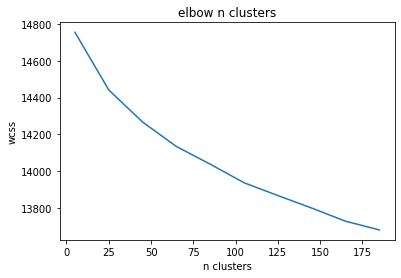

In [20]:
wcss = []
for i in range(5,205,20):
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit_transform(tfidf_vecs_short)
    wcss.append(kmeans_model.inertia_)
plt.plot(range(5,205,20),wcss)
plt.title('elbow n clusters')
plt.xlabel('n clusters')
plt.ylabel('wcss')
plt.show()

In [47]:
kmeans_model = KMeans(n_clusters=24, random_state=0)
kmeans_out = kmeans_model.fit_transform(tfidf_vecs_short)
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
pd.DataFrame([[terms_short[i] for i in order_centroids[j]] for j in range(len(order_centroids))],
                          index=[f'Topic {x}' for x in range(24)]).iloc[:,:9]

,0,1,2,3,4,5,6,7,8
Topic 0,ha,everyone,know,wa,vaccine,think,government,every,done
Topic 1,kid,school,parent,child,know,hepatitis,risk,young,wa
Topic 2,wa,know,first,vaccine,month,pfizer,everyone,think,sick
Topic 3,trump,biden,president,wa,death,died,joe,american,office
Topic 4,vaccine,know,think,go,new,read,case,pfizer,risk
Topic 5,body,choice,woman,come,forced,hypocrite,abortion,mandate,choose
Topic 6,booster,second,2nd,two,dos,death,first,covid,fully
Topic 7,im,sure,ive,wa,know,boosted,sick,vaccine,saying
Topic 8,vaccinated,fully,boosted,died,unvaccinated,im,death,majority,ha
Topic 9,died,know,wa,people,number,vaccine,death,american,die


In [24]:
topic_number = 4
topic = np.argsort(kmeans_out[:,topic_number])
for tweet in list(dict.fromkeys((topic[:5]))):
    print(short_docs[tweet])

vaccine shit anyway lol know unvaccinated fine fact know several died nothing use brain next speak
everyone know wa know lot havent jab
people know go hospital unvaccinated go extremely sick experience far
come think actually care kid better know better
know whole family twice wont vaccine


In [25]:
topic_number = 1
topic = np.argsort(kmeans_out[:,topic_number])
for tweet in list(dict.fromkeys((topic[:5]))):
    print(short_docs[tweet])

kid kid matter virtually risk lying risk kid
many kid dying wa kid vaccinated
kid arent eligible trying risk kid health unvaccinated kid unvaccinated kid developing long postcovid condition
youre lying kid young none initial kid uk around kid alabama trying caused something almost kid hadnt
house wa adult unvaccinated kid came kid point


# Conclusions

## Make word clouds from intersting topics found in the above data

There are too many topics to make word clouds for all of them

In [ ]:
#Still need to work on this
wc = WordCloud(max_words=100,width=2000,height=1000).generate_from_frequencies()

#Figure out how to affect size of image - looks like extent but is more involved than I care to look at atm
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
cloud = WordCloud().generate('. '.join([short_docs[tweet] for tweet in list(dict.fromkeys((np.argsort(kmeans_out[:,10])[:100])))]))

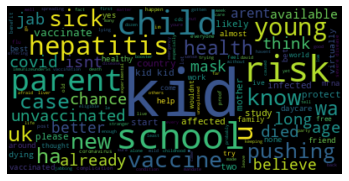

In [42]:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

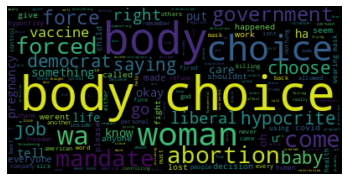

In [44]:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

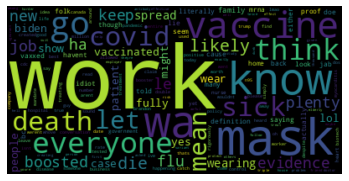

In [46]:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()